# Lab 3

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-3](https://yuanyuyuan.github.io/itcm/lab-3.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 10/30(Wed.)**

In [1]:
name = "蔡子暘"
student_id = "B07201025"

---

# Exercise 2
---

## It is known that when interpolating a function $f(x)$ with a polynomial $p_{m+1}$ of degree $m$ that using $x_j$ for $j = 0, 1, \dots, m$ as interpolation points the error has the form
## $$|f(x) - p_{m+1}(x)| = \frac{\left| f^{(m+1)} (\xi_x) \right|}{(m+1)!}\ \left| \prod_{k=0}^{m} (x - x_k) \right|,$$
## where $\xi_x \in [x_0, x_m]$.

## Therefore, the polynomial $\omega_m(t) := \prod_{k=0}^{m} (t - x_k)$ influences the size of the interpolation error.

---
## 1. Put $m+1$ <span style="color:red"> *distinct equidistant points*</span> in the interval $[−1, 1]$, and plot $\omega_m(t)$ for $m = 5, 10, 15, 20$.

### Part 0. Import libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Define $\omega_m(t)$ function.

In [3]:
def omega_m(t, x):
    n=len(x)
    f=1
    for i in range(n) :
        f=f*(t-x[i])
    return f

In [4]:
# Test
print('w_5(0.5) =', omega_m(0.5, np.linspace(-1, 1, 6)))


w_5(0.5) = 0.017325000000000007


### Part 2. Define the equidistant points function.

#### For example, if $m = 4$, then $m+1$ distinct equidistant points in the interval  $[−1,1]$ should be $[-1, -0.5, 0, 0.5, 1]$.
#### So the results of <code>equidistant_points(4)</code> will be <code>[-1.  -0.5  0.   0.5  1. ]</code>.

In [5]:
def equidistant_points(m):
    a=[]
    for i in range(m) :
        a.append(i/m)
    return a

In [6]:
# Test
m = 4
print("Equidistant points:", equidistant_points(m))


Equidistant points: [0.0, 0.25, 0.5, 0.75]


### Part 3. plot $\omega_m(t)$ for $m = 5, 10, 15, 20$.
#### Please refer parts of plotting in " _lagrange.ipynb_ ".

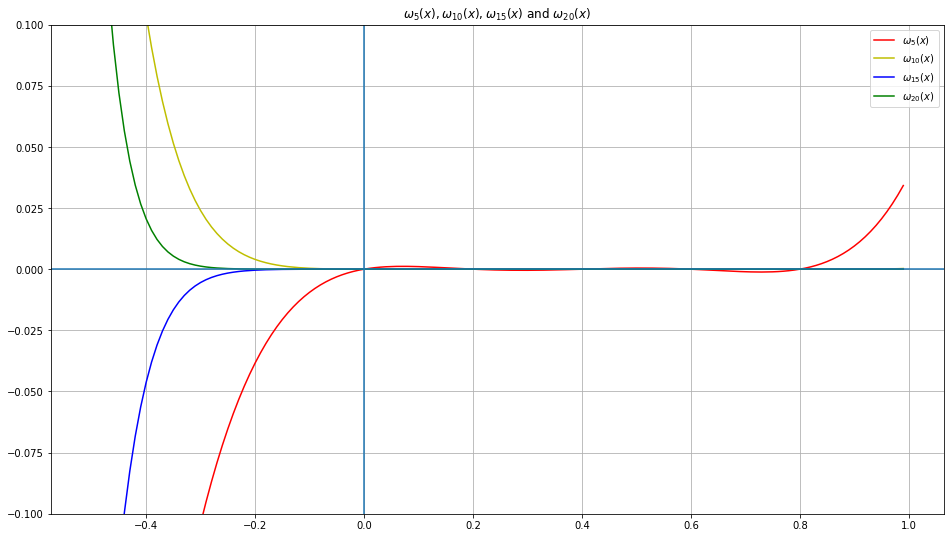

In [7]:
x_range = np.arange(-0.5, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x_range, omega_m(x_range,equidistant_points(5)), color='r', label='$\omega_5(x)$')
ax.plot(x_range, omega_m(x_range,equidistant_points(10)), color='y', label='$\omega_{10}(x)$')
ax.plot(x_range, omega_m(x_range,equidistant_points(15)), color='b', label='$\omega_{15}(x)$')
ax.plot(x_range, omega_m(x_range,equidistant_points(20)), color='g', label='$\omega_{20}(x)$')
ax.set_title(r'$\omega_{5}(x), \omega_{10}(x), \omega_{15}(x)$ and $\omega_{20}(x)$')
plt.legend(loc='upper right')
ax.grid(True)
plt.ylim(-0.1,0.1)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Part 4. What's your observation of the above figure?

When the number of terms gets larger, the function converges to 0 faster. As a consequence, the error gets smaller, which make the approxiamtion more precise.

---
## 2. Redo " *Problem 1.* " using <span style="color:red">*zeros of the Chebyshev polynomial (Chebyshev nodes)*</span> as the interpolation points.

### Part 1. Define Chebyshev nodes.
#### Please refer the part of Chebyshev nodes in " _lagrange.ipynb_ ".

In [8]:
def chebv_nodes(m):
    a=[]
    for i in range(m):
        a.append((1+np.cos(np.pi*i/m))/2)
    return a

In [9]:
# Test
m = 5
print("Chebyshev nodes:", chebv_nodes(m))


Chebyshev nodes: [1.0, 0.9045084971874737, 0.6545084971874737, 0.34549150281252633, 0.09549150281252633]


### Part 2. plot $\omega(t)$ for $m = 5, 10, 15, 20$.
#### Please refer parts of plotting in " _lagrange.ipynb_ ".

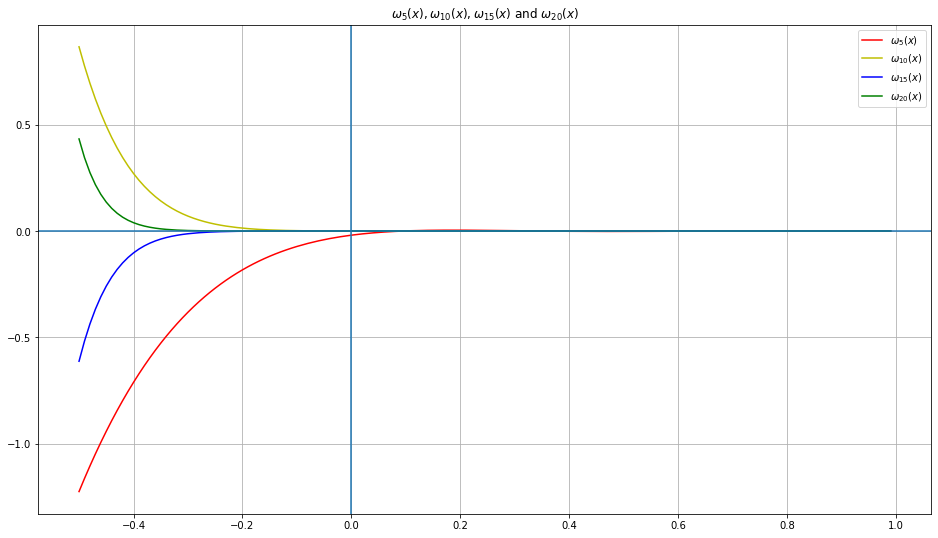

In [10]:
x_range = np.arange(-0.5, 1, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(x_range, omega_m(x_range,chebv_nodes(5)), color='r', label='$\omega_5(x)$')
ax.plot(x_range, omega_m(x_range,chebv_nodes(10)), color='y', label='$\omega_{10}(x)$')
ax.plot(x_range, omega_m(x_range,chebv_nodes(15)), color='b', label='$\omega_{15}(x)$')
ax.plot(x_range, omega_m(x_range,chebv_nodes(20)), color='g', label='$\omega_{20}(x)$')
ax.set_title(r'$\omega_{5}(x), \omega_{10}(x), \omega_{15}(x)$ and $\omega_{20}(x)$')
ax.set_title(r'$\omega_{5}(x), \omega_{10}(x), \omega_{15}(x)$ and $\omega_{20}(x)$')
plt.legend(loc='upper right')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Part 3. What's your observation of the above figure?

When the number of terms gets larger, the function converges to 0 faster. As a consequence, the error gets smaller, which make the approxiamtion more precise.
Compare to the previous figure, we find out this method converges faster, which is more efficient.